In [0]:
import IPython.display as dp
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pip install imageio

In [0]:
img="https://themysteriousworld.com/wp-content/uploads/2018/12/anemone.jpg"

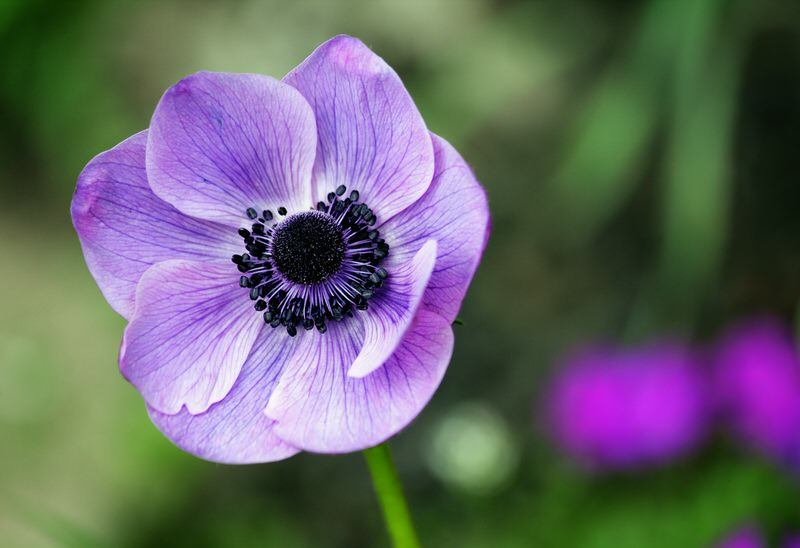

In [6]:
%matplotlib inline
import requests

#copy the image address
dp.Image(requests.get(img).content)

In [0]:
#read the using imageio package imread method and uri from web 
src_img=imageio.imread(img)
import numpy as np

#we grayscale the image in which 8 bit imgs which take value ranging from 0 to 255 (0-dark and 255 -fully white)

def grayscaleimg(rgb):
  return np.dot(rgb[...,:3],[0.299,0.587,0.114])

greyscl=grayscaleimg(src_img)

 

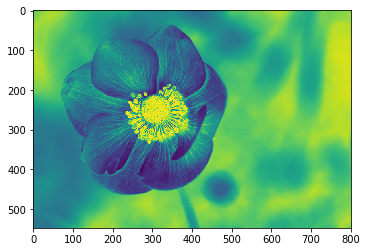

In [8]:
#invert the image by subtraction from 255
inv_img=(255-greyscl)  #we invert it to create a negative of the image like olden days camera where dark area in image bcm light and light areas become dark .THis makes it easy for machine to understand
plt.imshow(inv_img)


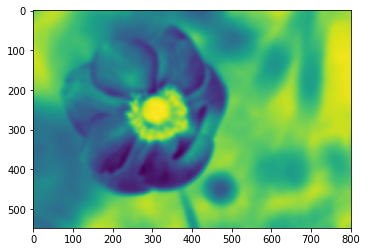

In [9]:
#blur the image using gaussian filter
import scipy.ndimage
blurred_img=scipy.ndimage.filters.gaussian_filter(inv_img,sigma=5) #sigma ,the std deviation is used as parameter of quantity of smoothing/bluuring
plt.imshow(blurred_img)
#why are we blurring the image?
#its coz to remove the noise and smoothen out the irregularity

In [0]:
#dodging technique:used to highlight the prominent areas of image
def dodging(blur_img,grey_img):
  resultant_dodge=blur_img*255/(255-grey_img)
  resultant_dodge[resultant_dodge>255]=255
  resultant_dodge[grey_img==255]=255
  return resultant_dodge.astype('uint8')


In [0]:
target_img=dodging(blurred_img,greyscl)

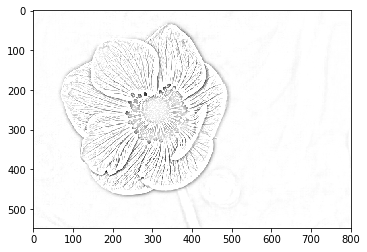

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img,cmap='gray')

In [0]:
plt.imsave('target_img.png',target_img,cmap='gray',vmin=00,vmax=255) #saveing the iamge
